In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
import import_ipynb
#import Scaling_methods as scaling

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}

matplotlib.rc('font', **font)

matplotlib.rc('axes', titlesize=14)
matplotlib.rc('xtick', labelsize=14)     
matplotlib.rc('ytick', labelsize=20)

import matplotlib.pylab as pylab
params = {'legend.fontsize': 12,
         'axes.labelsize': 16,
         'axes.titlesize':16,
         'xtick.labelsize':10,
         'ytick.labelsize':10}
pylab.rcParams.update(params)

In [3]:

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

matplotlib.rc('axes', titlesize=12)
matplotlib.rc('xtick', labelsize=12)     
matplotlib.rc('ytick', labelsize=12)


In [4]:

import matplotlib.pylab as pylab
params = {'legend.fontsize': 12,
         'axes.labelsize': 14,
         'axes.titlesize':15,
         'xtick.labelsize':11,
         'ytick.labelsize':11}
pylab.rcParams.update(params)


In [5]:
#features used
index = ['u (m/s)', 'T (K)', 'H2', 'H', 'O', 'O2', 'OH',
       'H2O', 'HO2', 'H2O2', 'C', 'CH', 'CH2', 'CH2(S)', 'CH3', 'CH4', 'CO',
       'CO2', 'HCO', 'CH2O', 'CH2OH', 'CH3O', 'CH3OH', 'C2H', 'C2H2', 'C2H3',
       'C2H4', 'C2H5', 'C2H6', 'HCCO', 'CH2CO', 'HCCOH', 'N', 'NH', 'NH2',
       'NH3', 'NNH', 'NO', 'NO2', 'N2O', 'HNO', 'CN', 'HCN', 'H2CN', 'HCNN',
       'HCNO', 'HOCN', 'HNCO', 'NCO', 'N2', 'AR', 'C3H7', 'C3H8', 'CH2CHO',
       'CH3CHO']
# target
target_name = ['Tin']

In [6]:
Y_pf = pd.read_csv("Y_pf.csv", sep=',', names = index) #shape: (26000, 55)

In [7]:
X_pf = pd.read_csv("X.csv", sep=',', names = ['unknown_1', 'unknown_2', 'Tin']) #shape: (25999, 3) 
X_pf.head()


,unknown_1,unknown_2,Tin
0,0.011614,0.085258,500
1,0.017166,0.085258,900
2,0.018035,0.033771,500
3,0.013240,0.028302,300
4,0.014744,0.060219,900


In [8]:
# Features
#df = new_labels  #shape:
df = Y_pf         #shape:

# target
#target = labels['Tin']  #shape:
target = X_pf['Tin']     #shape:

In [9]:
df_with_target = pd.concat([Y_pf, target],axis=1)

In [10]:
Y_pf_sampled = df_with_target.loc[(df_with_target['Tin'] == 300)]
Y_pf_sampled.head()
X_sampled = Y_pf_sampled.drop(['Tin'], axis =1)

In [11]:
Y_pf_sampled

,u (m/s),T (K),H2,H,O,O2,OH,H2O,HO2,H2O2,...,HOCN,HNCO,NCO,N2,AR,C3H7,C3H8,CH2CHO,CH3CHO,Tin
3,0.089593,554.13,8.067400e-04,3.398100e-11,1.818100e-11,1.806000e-01,3.219000e-09,2.733300e-02,8.011000e-06,2.467200e-05,...,5.591500e-13,8.089500e-10,3.104600e-13,0.74618,5.923600e-100,9.898600e-12,1.623300e-07,1.007400e-12,5.323300e-07,300
5,2.333300,2088.70,2.426100e-03,5.550100e-04,7.346700e-04,2.206800e-02,4.458200e-03,1.666200e-01,1.861900e-06,1.041500e-07,...,2.546000e-14,1.233100e-11,1.006400e-12,0.71745,1.059000e-22,9.511900e-38,1.918500e-39,7.600600e-26,9.279400e-28,300
6,0.375810,300.00,1.616300e-05,8.620400e-24,8.607900e-14,1.882500e-01,5.051900e-17,2.774700e-10,2.004800e-13,8.422500e-14,...,0.000000e+00,4.137200e-15,0.000000e+00,0.70816,0.000000e+00,0.000000e+00,1.135900e-15,2.601800e-26,2.091600e-16,300
13,0.373330,300.14,1.089000e-03,3.277500e-16,7.070300e-11,1.898300e-01,8.988800e-12,1.810400e-05,2.158700e-08,1.132800e-08,...,1.746300e-15,1.288700e-12,1.118600e-15,0.71412,3.118600e-23,7.432500e-14,2.329400e-12,4.160100e-18,1.891900e-11,300
18,0.113240,300.00,8.531500e-06,0.000000e+00,0.000000e+00,1.975500e-01,0.000000e+00,1.453300e-08,1.807100e-12,5.223100e-12,...,1.236000e-20,9.041000e-17,0.000000e+00,0.74316,0.000000e+00,5.987500e-16,0.000000e+00,9.357600e-28,7.393800e-16,300
23,2.604800,2057.40,9.129800e-03,3.135400e-03,1.624600e-03,1.335400e-02,6.517600e-03,1.713600e-01,2.851200e-06,1.557400e-07,...,4.459300e-13,3.500900e-11,4.121700e-12,0.70181,3.064800e-23,3.822100e-35,6.546700e-37,8.426900e-23,1.270900e-24,300
24,0.100120,300.00,1.950500e-04,5.675800e-23,1.580400e-15,1.813800e-01,9.290500e-19,1.218300e-08,9.572400e-13,1.841400e-12,...,1.413300e-15,1.436900e-16,0.000000e+00,0.68234,0.000000e+00,0.000000e+00,0.000000e+00,2.330000e-26,1.582400e-16,300
28,0.231900,300.00,3.895400e-04,2.254600e-20,2.088800e-13,1.847000e-01,1.338200e-16,1.063800e-07,3.803800e-11,2.607300e-11,...,9.808600e-18,0.000000e+00,0.000000e+00,0.69481,1.353100e-103,0.000000e+00,6.142200e-16,3.741300e-23,7.480400e-15,300
29,0.965870,1976.70,6.303900e-02,4.690400e-04,6.803500e-07,8.436500e-07,1.249200e-04,1.758700e-01,3.907800e-10,3.660700e-10,...,1.269900e-08,4.163600e-07,1.109900e-09,0.64117,0.000000e+00,2.003900e-17,2.135600e-16,2.818300e-12,3.006500e-12,300
33,0.372770,300.00,7.543500e-07,0.000000e+00,0.000000e+00,1.900400e-01,0.000000e+00,8.467200e-13,0.000000e+00,0.000000e+00,...,1.811200e-20,0.000000e+00,0.000000e+00,0.71490,3.122000e-23,7.490100e-14,0.000000e+00,0.000000e+00,1.194000e-16,300


In [12]:
class RangeScaler():
    def __init__(self):
        return None

    def transform(self, X):
        """Centring and Scaling the features of X"""
        X = np.asarray(X)
        X = np.float64(X)
        sd = np.std(X, axis=0)
        Z = X/(np.max(X, axis=0)-np.min(X, axis=0))
        return Z
    
    def fit_transform(self, X):
        """Centring and Scaling the features of X"""
        X = np.asarray(X)
        X = np.float64(X)
        sd = np.std(X, axis=0)
        X_mean = X.mean(axis=0)
        X_center = X-X_mean
        Z = X_center/(np.max(X, axis=0)-np.min(X, axis=0))
        return Z

In [13]:
X = X_sampled
range_scaler = RangeScaler()
X_range_scaled = range_scaler.fit_transform(X)

range_scaler = RangeScaler()
X_range_scaled = range_scaler.fit_transform(X)

In [14]:
X_range_scaled.shape

(6500, 55)

In [15]:
def write_in_file(file_name, data):
    """store data in the given file in
        binary mode with overwritng option

        Input:
                file_name : the name of the file
                data : list or numpy array"""

    with open(file_name, 'wb') as fp:
        pickle.dump(data, fp)


def read_from_file(file_name):
    """Read data from the given file in
        binary mode

        Input:
                file_name : the name of the file
        Ouput :
                data : list or numpy array"""

    with open(file_name, 'rb') as fp:
        data = pickle.load(fp)
    return data   

In [16]:
path = r'C:\Users\azarguit\Desktop\master\memoire\case_study\lpca_sampled' + '\\'
input_file_name = path + 'input_data_set.txt'
write_in_file(input_file_name, X_range_scaled)

In [17]:
"""
Script for calling matlab functions and store the results into files

Input  : file of numpy arrays:
                               input_file_name = 'input_data_set.txt'
                               
Output : files of numpy arrays
"""


import matlab.engine
import numpy as np
import pickle
import matlab



def write_in_file(file_name, data):
    """store data in the given file in
        binary mode with overwritng option

        Input:
                file_name : the name of the file
                data : list or numpy array"""

    with open(file_name, 'wb') as fp:
        pickle.dump(data, fp)


def read_from_file(file_name):
    """Read data from the given file in
        binary mode

        Input:
                file_name : the name of the file
        Ouput :
                data : list or numpy array"""

    with open(file_name, 'rb') as fp:
        data = pickle.load(fp)
    return data




n_eigs = 1
k = 1

path = r'C:\Users\azarguit\Desktop\master\memoire\case_study\lpca_sampled' + '\\'
input_file_name = path + 'input_data_set.txt'


data = read_from_file(input_file_name)
print(data.shape)
print(type(data))

print('data input size of python array')
data_list = data.tolist()
print(len(data_list))

X = matlab.double(data_list)

print('data input size of mlarray')
print(X.size)


eng = matlab.engine.start_matlab()
idx = eng.localPCA(X, n_eigs, k)

clusters = eng.get_clusters(X, idx)

print('clusters')


eigvec, n_eig, gamma, u_scores, eigenvalues, centroids = eng.lpca(clusters, n_eigs, nargout=6)

print('writing in files')

idx_file_name = 'idx.txt'
clusters_file_name = 'clusters.txt'
eigvec_file_name = 'eigvec.txt'
n_eig_file_name = 'n_eig.txt'
gamma_file_name = 'gamma.txt'
u_scores_file_name = 'u_scores.txt'
eigenvalues_file_name = 'eigenvalues.txt'
centroids_file_name = 'centroids.txt'


clusters = np.asarray(clusters)[0]
eigvec = np.asarray(eigvec)[0]
n_eig = np.asarray(n_eig)[0]
gamma = np.asarray(gamma)[0]
u_scores = np.asarray(u_scores)[0]
eigenvalues = np.asarray(eigenvalues)[0]
centroids = np.asarray(centroids)


np.save(path+idx_file_name, idx)
np.save(path+clusters_file_name, clusters)
np.save(centroids_file_name, centroids)


(6500, 55)
<class 'numpy.ndarray'>
data input size of python array
6500
data input size of mlarray
(6500, 55)
clusters
writing in files


In [ ]:
path = r'C:\Users\azarguit\Desktop\master\memoire\case_study\lpca_sampled' + '\\'
idx_file_name = path + 'idx.txt.npy'
clusters_file_name = path +'clusters.txt.npy'
centroids_file_name = 'centroids.txt.npy'

idx = np.load(idx_file_name)
clusters = np.load(clusters_file_name)
centroids = np.load(centroids_file_name)


In [ ]:
columns_new = ['idx']
# pass in array and columns
df_idx = pd.DataFrame(idx, columns=columns_new)
df_idx =  df_idx['idx']
df_idx = pd.to_numeric(df_idx, downcast='signed')
#df_idx.to_numeric(s, downcast='signed')
df_idx.unique()

In [ ]:
X_range_scaled = pd.DataFrame(X_range_scaled, columns= index)
clustered_labels = pd.concat([X_range_scaled, df_idx], axis=1)
clustered_labels[idx == 2].drop('idx', axis =1).as_matrix()
#clustered_labels.as_matrix()

In [ ]:
#output = clustered_labels.to_dict('idx')
#output
centroids.shape[0]


In [ ]:
s = np.sum((clustered_labels[idx == 2].drop('idx', axis =1).as_matrix()-centroids[1,:])**2)
s

In [ ]:
#to find optimum number of clusters use elbow method
WCSS_array=np.array([])
for K in range(1,2):
    kmeans=Kmeans(X,K)
    kmeans.fit(n_iter)
    Output,Centroids=kmeans.predict()
    print(Centroids[0,:])
    s = np.sum((Output[1]-Centroids[0,:])**2)
    print(s)

In [ ]:

#df_with_target = pd.concat([eda.df, eda.target], axis=1)
#clustered_labels = clustered_labels[clustered_labels.idx != 2]
#clustered_labels = clustered_labels[clustered_labels.idx != 3]
#clustered_labels = clustered_labels[clustered_labels.idx != 6]
#clustered_labels = clustered_labels[clustered_labels.idx != 7]
#clustered_labels = clustered_labels[clustered_labels.idx != 8]
#df_idx = clustered_labels['idx']
#df1 = df[['a','b']]
#clustered_labels.drop('idx', axis=1).shape

In [ ]:
pca_range = PCA(n_components=None)

pca_range.fit(X_range_scaled)

x_pca_range = pca_range.transform(X_range_scaled)

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 5))

surf1 = ax1.scatter(x_pca_range[:,0],x_pca_range[:,1],c=df_idx, s=2)
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
ax1.set_title('Local PCA Clustering:')
fig.colorbar(surf1,label='Clusters', ticks = df_idx.unique() )
plt.savefig(r'C:\Users\azarguit\Desktop\master\memoire\case_study\clustering\Local_PCA_clustering_5.pdf')

In [ ]:
import numpy
 
def dist(x,y):   
    return numpy.sqrt(numpy.sum((x-y)**2))



In [ ]:
"""
WCSS_array=np.array([])
K = 54
wcss=0
for j in range(100):
    for k in range(0, K):
        wcss+=np.sum((clusters[j][k]-centroids.T[j,:])**2)
    
        WCSS_array=sum(np.append(WCSS_array,wcss))
    

WCSS_array=np.array([])
for K in range(1,11):
    kmeans=Kmeans(X,K)
    kmeans.fit(n_iter)
    Output,Centroids=kmeans.predict()
    wcss=0
    for k in range(K):
        wcss+=np.sum((Output[k+1]-Centroids[k,:])**2)
    WCSS_array=np.append(WCSS_array,wcss)
"""
# https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42

In [ ]:
WCSS_array

In [ ]:
X_range_scaled = pd.DataFrame(X_range_scaled, columns= index)
clustered_labels = pd.concat([X_range_scaled, df_idx], axis=1)
clustered_labels.head()

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=clustered_labels, x='idx')
plt.title('Clusters cardinality')
plt.ylabel('Cardinality')
plt.xlabel('Clusters')
#plt.savefig(r'C:\Users\azarguit\Desktop\master\memoire\case_study\clustering\Local_PCA_cardinality_10.pdf')


# Feature Importance

In [ ]:
Y_pf_sampled = Y_pf_sampled.reset_index(drop=True)
df_labels = df_idx 
Y_pf_sampled_labeled = pd.concat([Y_pf_sampled, df_labels], axis=1) 
Y_pf_sampled_labeled.head()

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split



X= Y_pf_sampled_labeled.drop(['idx','Tin'], axis =1) # Features
y = Y_pf_sampled_labeled['idx'] # Labels

#X= df_scaled # Features
#y=df_labels  # Labels
#X = kmeans_labels_ratio.drop(['kmeans_idx'], axis =1)
#y = kmeans_labels_ratio['kmeans_idx'] # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
y.unique()

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

In [ ]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=index).sort_values(ascending=False)
feature_imp*100

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot

# Add labels to your graph
plt.figure(figsize=(26,8))
sns.barplot(y=feature_imp, x=feature_imp.index)
plt.ylabel('Feature Importance Score', fontsize=22)
plt.xlabel('Features',fontsize=22)
plt.title("Visualizing Important Features")
plt.savefig(r'C:\Users\azarguit\Desktop\master\memoire\case_study\importance\feature_importance_Local_PCA.pdf')
#plt.legend()
plt.show()


# Knowledge extraction

In [ ]:
#kmeans_labels_ratio = pd.concat([Y_pf_sampled_ratio.reset_index(drop=True), df_labels_ratio], axis=1)
kmeans_clusters_idx = ['cluster_'+str(k+1) for k in range(10)]
#kmeans_clusters_idx_ratio_T = ['cluster_'+str(k+1) for k in range(10)]
l = []
feature = 'u (m/s)'
Y_pf_sampled_labeled = pd.concat([Y_pf_sampled, df_labels], axis=1) 
Y_pf_sampled_labeled.head()
for k in range(1,6):
    
    kmeans_clusters_idx[k] = Y_pf_sampled_labeled.loc[Y_pf_sampled_labeled['idx'] == k] 
    kmeans_clusters_idx[k]['average'] = kmeans_clusters_idx[k][feature].mean()
    #kmeans_clusters_idx_ratio_T[k] = kmeans_clusters_idx_ratio[k]
    #kmeans_clusters_idx_ratio_T[k]['average'] = kmeans_clusters_idx_ratio_T[k]['T (K)'].mean()
    l.append(kmeans_clusters_idx[k][feature].mean())
    
#kmeans_clusters_idx[0].head(10)
print(l)


"""H2O        15.354026
O2         10.231660
T (K)       8.845028
CO2         7.674385
CH4         7.569258
CO          6.751055
N2          5.752940
u (m/s)     5.366498
OH          5.245702
H2          4.937506
H           3.621372"""

In [ ]:
# Create the dictionary 
#event_dictionary ={0 : l[0], 1 : l[1], 2 : l[2], 3 : l[3], 4 : l[4], 5 : l[5], 6 : l[6], 7 : l[7], 8 : l[8], 9 : l[9]} 
#event_dictionary ={1 : l[1], 2 : l[2], 3 : l[3], 4 : l[4], 5 : l[5]} 
event_dictionary ={0 : l[0], 1 : l[1], 2 : l[2], 3 : l[3], 4 : l[4]}
# Add a new column named 'Price' 
Y_pf_sampled_labeled['average'] = (Y_pf_sampled_labeled['idx']-1).map(event_dictionary)
#Y_pf_sampled_labeled['average'] = Y_pf_sampled_labeled['idx'].map()
Y_pf_sampled_labeled.head()

In [ ]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 5))

surf1 = ax1.scatter(x_pca_range[:,0],x_pca_range[:,1],c=Y_pf_sampled_labeled['average'] , s= 2)
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
ax1.set_title('Local PCA Clustering')
fig.colorbar(surf1,label=feature, ticks=l)
plt.savefig(r'C:\Users\azarguit\Desktop\master\memoire\case_study\importance\Local_PCA_u.pdf')

In [19]:
WCSS_array=np.array([])

for K in range(1,100):
    if K < 51:
        print(K)
        n_eigs = K

        path = r'C:\Users\azarguit\Desktop\master\memoire\case_study\lpca_sampled' + '\\'
        input_file_name = path + 'input_data_set.txt'


        data = read_from_file(input_file_name)
        print(data.shape)
        print(type(data))

        print('data input size of python array')
        data_list = data.tolist()
        print(len(data_list))

        X = matlab.double(data_list)

        print('data input size of mlarray')
        print(X.size)


        eng = matlab.engine.start_matlab()
        idx = eng.localPCA(X, n_eigs, K)

        clusters = eng.get_clusters(X, idx)

        print('clusters')


        eigvec, n_eig, gamma, u_scores, eigenvalues, centroids = eng.lpca(clusters, n_eigs, nargout=6)

        print('writing in files')

        idx_file_name = 'idx.txt'
        clusters_file_name = 'clusters.txt'
        eigvec_file_name = 'eigvec.txt'
        n_eig_file_name = 'n_eig.txt'
        gamma_file_name = 'gamma.txt'
        u_scores_file_name = 'u_scores.txt'
        eigenvalues_file_name = 'eigenvalues.txt'
        centroids_file_name = 'centroids.txt'


        clusters = np.asarray(clusters)[0]
        eigvec = np.asarray(eigvec)[0]
        n_eig = np.asarray(n_eig)[0]
        gamma = np.asarray(gamma)[0]
        u_scores = np.asarray(u_scores)[0]
        eigenvalues = np.asarray(eigenvalues)[0]
        centroids = np.asarray(centroids)


        np.save(path+idx_file_name, idx)
        np.save(path+clusters_file_name, clusters)
        np.save(centroids_file_name, centroids)


        path = r'C:\Users\azarguit\Desktop\master\memoire\case_study\lpca_sampled' + '\\'
        idx_file_name = path + 'idx.txt.npy'
        clusters_file_name = path +'clusters.txt.npy'
        centroids_file_name = 'centroids.txt.npy'

        idx = np.load(idx_file_name)
        clusters = np.load(clusters_file_name)
        centroids = np.load(centroids_file_name)


        columns_new = ['idx']
# pass in array and columns
        df_idx = pd.DataFrame(idx, columns=columns_new)
        df_idx =  df_idx['idx']
        df_idx = pd.to_numeric(df_idx, downcast='signed')
#df_idx.to_numeric(s, downcast='signed')
        df_idx.unique()


        X_range_scaled = pd.DataFrame(X_range_scaled, columns= index)
        clustered_labels = pd.concat([X_range_scaled, df_idx], axis=1)
    #clustered_labels[idx == 2].drop('idx', axis =1).as_matrix()

        wcss=0
        J = centroids.shape[0]
        print(J)
        for k in range(J):
            wcss+=np.sum((clustered_labels[idx == k+1].drop('idx', axis =1).as_matrix()-centroids[k,:])**2)
    #WCSS_array=np.append(WCSS_array,kmeans.WCSS())
        WCSS_array=np.append(WCSS_array,wcss)
        #print(WCSS_array)

1
(6500, 55)
<class 'numpy.ndarray'>
data input size of python array
6500
data input size of mlarray
(6500, 55)
clusters
writing in files
1
2
(6500, 55)
<class 'numpy.ndarray'>
data input size of python array
6500


C:\Users\azarguit\Anaconda3\lib\site-packages\ipykernel\__main__.py:89: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


data input size of mlarray
(6500, 55)
clusters
writing in files
2
3
(6500, 55)
<class 'numpy.ndarray'>
data input size of python array
6500
data input size of mlarray
(6500, 55)
clusters
writing in files
3
4
(6500, 55)
<class 'numpy.ndarray'>
data input size of python array
6500
data input size of mlarray
(6500, 55)
clusters
writing in files
4
5
(6500, 55)
<class 'numpy.ndarray'>
data input size of python array
6500
data input size of mlarray
(6500, 55)
clusters
writing in files
5
6
(6500, 55)
<class 'numpy.ndarray'>
data input size of python array
6500
data input size of mlarray
(6500, 55)
clusters
writing in files
6
7
(6500, 55)
<class 'numpy.ndarray'>
data input size of python array
6500
data input size of mlarray
(6500, 55)
clusters
writing in files
7
8
(6500, 55)
<class 'numpy.ndarray'>
data input size of python array
6500
data input size of mlarray
(6500, 55)
clusters
writing in files
8
9
(6500, 55)
<class 'numpy.ndarray'>
data input size of python array
6500
data input size of m

In [20]:
WCSS_array

array([13030.29198415,  7124.83456839,  4817.96369523,  3852.0752518 ,
        3160.42359507,  3245.7044004 ,  2877.17894881,  2519.67752296,
        2293.19179874,  2269.25718569,  2186.25191058,  1848.64139419,
        1930.10487205,  2142.76768381,  2401.79857679,  2513.9473296 ,
        1974.79559869,  1709.94884891,  1618.51995112,  1603.73039918,
        1600.35097997,  1554.37489385,  1594.57065489,  1574.60082213,
        1533.58248052,  1498.94046123,  1411.55465832,  1386.7193049 ,
        1236.60471528,  1251.8474361 ,  1368.46070934,  1212.58259798,
        1501.6889917 ,  1257.79481996,  1472.59467107,  1911.29732402,
        1700.61817057,  1651.31379856,  1558.10452101,  1484.55559972,
        1623.10824421,  1718.59980634,  1777.84898174,  1995.61395343,
        2437.35625659,  2522.7728444 ,  2506.22356975,  1781.951914  ,
        5614.47269015,  3269.56597697])

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

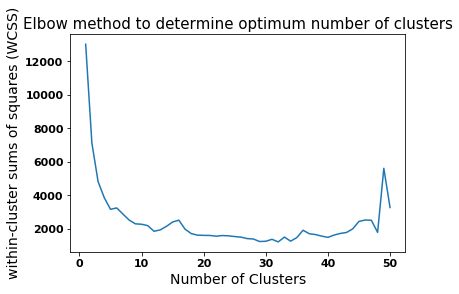

In [21]:
K_array=np.arange(1,51,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

In [27]:
WCSS_array_f = WCSS_array
WCSS_array_f[49] = WCSS_array[47]
WCSS_array_f[48] = WCSS_array[47]

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\azarguit\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. 

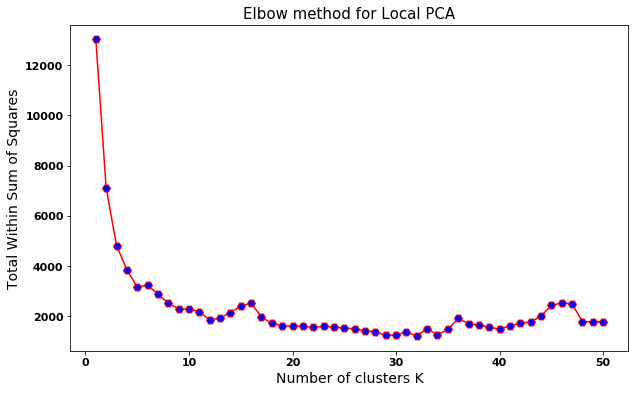

In [30]:

plt.figure(figsize=(10,6))
plt.plot(K_array,WCSS_array_f,
         
         # Some figure aesthetics
         linestyle='-', # '-' for Continuous line 
         marker='H', # 'H' for Hexagons 
         color='r', # 'g' for green color
         markersize = 8, # size of the masker
         markerfacecolor='b') # 'b' for blue color
plt.title('Elbow method for Local PCA')
plt.xlabel('Number of clusters K')
plt.ylabel('Total Within Sum of Squares')
plt.savefig(r'C:\Users\azarguit\Desktop\master\memoire\case_study\clustering\LPCA_elbow.pdf')

In [18]:
WCSS_array=np.array([])

for K in range(1,100):
    if K < 51:
        print(K)
        n_eigs = K

        path = r'C:\Users\azarguit\Desktop\master\memoire\case_study\lpca_sampled' + '\\'
        input_file_name = path + 'input_data_set.txt'


        data = read_from_file(input_file_name)
        print(data.shape)
        print(type(data))

        print('data input size of python array')
        data_list = data.tolist()
        print(len(data_list))

        X = matlab.double(data_list)

        print('data input size of mlarray')
        print(X.size)


        eng = matlab.engine.start_matlab()
        idx = eng.localPCA(X, n_eigs, K)

        clusters = eng.get_clusters(X, idx)

        print('clusters')


        eigvec, n_eig, gamma, u_scores, eigenvalues, centroids = eng.lpca(clusters, n_eigs, nargout=6)

        print('writing in files')

        idx_file_name = 'idx.txt'
        clusters_file_name = 'clusters.txt'
        eigvec_file_name = 'eigvec.txt'
        n_eig_file_name = 'n_eig.txt'
        gamma_file_name = 'gamma.txt'
        u_scores_file_name = 'u_scores.txt'
        eigenvalues_file_name = 'eigenvalues.txt'
        centroids_file_name = 'centroids.txt'


        clusters = np.asarray(clusters)[0]
        eigvec = np.asarray(eigvec)[0]
        n_eig = np.asarray(n_eig)[0]
        gamma = np.asarray(gamma)[0]
        u_scores = np.asarray(u_scores)[0]
        eigenvalues = np.asarray(eigenvalues)[0]
        centroids = np.asarray(centroids)


        np.save(path+idx_file_name, idx)
        np.save(path+clusters_file_name, clusters)
        np.save(centroids_file_name, centroids)


        path = r'C:\Users\azarguit\Desktop\master\memoire\case_study\lpca_sampled' + '\\'
        idx_file_name = path + 'idx.txt.npy'
        clusters_file_name = path +'clusters.txt.npy'
        centroids_file_name = 'centroids.txt.npy'

        idx = np.load(idx_file_name)
        clusters = np.load(clusters_file_name)
        centroids = np.load(centroids_file_name)


        columns_new = ['idx']
# pass in array and columns
        df_idx = pd.DataFrame(idx, columns=columns_new)
        df_idx =  df_idx['idx']
        df_idx = pd.to_numeric(df_idx, downcast='signed')
#df_idx.to_numeric(s, downcast='signed')
        df_idx.unique()


        X_range_scaled = pd.DataFrame(X_range_scaled, columns= index)
        clustered_labels = pd.concat([X_range_scaled, df_idx], axis=1)
    #clustered_labels[idx == 2].drop('idx', axis =1).as_matrix()

        wcss=0
        for k in range(K):
            wcss+=np.sum((clustered_labels[idx == k+1].drop('idx', axis =1).as_matrix()-centroids[k,:])**2)
    #WCSS_array=np.append(WCSS_array,kmeans.WCSS())
        WCSS_array=np.append(WCSS_array,wcss)

    else :
        K = K + 1
        print(K)
        n_eigs = K

        path = r'C:\Users\azarguit\Desktop\master\memoire\case_study\lpca_sampled' + '\\'
        input_file_name = path + 'input_data_set.txt'


        data = read_from_file(input_file_name)
        print(data.shape)
        print(type(data))

        print('data input size of python array')
        data_list = data.tolist()
        print(len(data_list))

        X = matlab.double(data_list)

        print('data input size of mlarray')
        print(X.size)


        eng = matlab.engine.start_matlab()
        idx = eng.localPCA(X, n_eigs, K)

        clusters = eng.get_clusters(X, idx)

        print('clusters')


        eigvec, n_eig, gamma, u_scores, eigenvalues, centroids = eng.lpca(clusters, n_eigs, nargout=6)

        print('writing in files')

        idx_file_name = 'idx.txt'
        clusters_file_name = 'clusters.txt'
        eigvec_file_name = 'eigvec.txt'
        n_eig_file_name = 'n_eig.txt'
        gamma_file_name = 'gamma.txt'
        u_scores_file_name = 'u_scores.txt'
        eigenvalues_file_name = 'eigenvalues.txt'
        centroids_file_name = 'centroids.txt'


        clusters = np.asarray(clusters)[0]
        eigvec = np.asarray(eigvec)[0]
        n_eig = np.asarray(n_eig)[0]
        gamma = np.asarray(gamma)[0]
        u_scores = np.asarray(u_scores)[0]
        eigenvalues = np.asarray(eigenvalues)[0]
        centroids = np.asarray(centroids)


        np.save(path+idx_file_name, idx)
        np.save(path+clusters_file_name, clusters)
        np.save(centroids_file_name, centroids)


        path = r'C:\Users\azarguit\Desktop\master\memoire\case_study\lpca_sampled' + '\\'
        idx_file_name = path + 'idx.txt.npy'
        clusters_file_name = path +'clusters.txt.npy'
        centroids_file_name = 'centroids.txt.npy'

        idx = np.load(idx_file_name)
        clusters = np.load(clusters_file_name)
        centroids = np.load(centroids_file_name)


        columns_new = ['idx']
# pass in array and columns
        df_idx = pd.DataFrame(idx, columns=columns_new)
        df_idx =  df_idx['idx']
        df_idx = pd.to_numeric(df_idx, downcast='signed')
#df_idx.to_numeric(s, downcast='signed')
        df_idx.unique()


        X_range_scaled = pd.DataFrame(X_range_scaled, columns= index)
        clustered_labels = pd.concat([X_range_scaled, df_idx], axis=1)
    #clustered_labels[idx == 2].drop('idx', axis =1).as_matrix()

        wcss=0
        for k in range(K-1):
            wcss+=np.sum((clustered_labels[idx == k+1].drop('idx', axis =1).as_matrix()-centroids[k,:])**2)
    #WCSS_array=np.append(WCSS_array,kmeans.WCSS())
        WCSS_array=np.append(WCSS_array,wcss)




1
(6500, 55)
<class 'numpy.ndarray'>
data input size of python array
6500
data input size of mlarray
(6500, 55)
clusters
writing in files


C:\Users\azarguit\Anaconda3\lib\site-packages\ipykernel\__main__.py:87: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


2
(6500, 55)
<class 'numpy.ndarray'>
data input size of python array
6500
data input size of mlarray
(6500, 55)
clusters
writing in files
3
(6500, 55)
<class 'numpy.ndarray'>
data input size of python array
6500
data input size of mlarray
(6500, 55)
clusters
writing in files
4
(6500, 55)
<class 'numpy.ndarray'>
data input size of python array
6500
data input size of mlarray
(6500, 55)
clusters
writing in files
5
(6500, 55)
<class 'numpy.ndarray'>
data input size of python array
6500
data input size of mlarray
(6500, 55)
clusters
writing in files
6
(6500, 55)
<class 'numpy.ndarray'>
data input size of python array
6500
data input size of mlarray
(6500, 55)
clusters
writing in files
7
(6500, 55)
<class 'numpy.ndarray'>
data input size of python array
6500
data input size of mlarray
(6500, 55)
clusters
writing in files
8
(6500, 55)
<class 'numpy.ndarray'>
data input size of python array
6500
data input size of mlarray
(6500, 55)
clusters
writing in files
9
(6500, 55)
<class 'numpy.ndarray

IndexError: index 9 is out of bounds for axis 0 with size 9

In [ ]:
K_array=np.arange(1,11,1)
plt.plot(K_array,WCSS_array)
plt.xlabel('Number of Clusters')
plt.ylabel('within-cluster sums of squares (WCSS)')
plt.title('Elbow method to determine optimum number of clusters')
plt.show()

In [ ]:
#https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/